In [2]:
pip install pyvo mocpy ipyaladin

     |████████████████████████████████| 910 kB 17.0 MB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 52.4 MB/s eta 0:00:01
     |████████████████████████████████| 11.4 MB 70.6 MB/s eta 0:00:01
     |████████████████████████████████| 927 kB 76.2 MB/s eta 0:00:01
     |████████████████████████████████| 2.1 MB 24.9 MB/s eta 0:00:01
     |████████████████████████████████| 213 kB 46.1 MB/s eta 0:00:01
     |████████████████████████████████| 736 kB 51.7 MB/s eta 0:00:01
     |████████████████████████████████| 749 kB 37.4 MB/s eta 0:00:01
     |████████████████████████████████| 139 kB 111.5 MB/s eta 0:00:01
     |████████████████████████████████| 699 kB 110.3 MB/s eta 0:00:01
     |████████████████████████████████| 2.3 MB 95.7 MB/s eta 0:00:01
     |████████████████████████████████| 214 kB 33.3 MB/s eta 0:00:01
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.5.1
    Uninstalling widgetsnbextension-3.5.1:
      Successfully uninst

In [1]:
# Access astronomical databases
from pyvo import registry  # version >=1.4.1 

# Moc and HEALPix tools
from mocpy import MOC

# Sky visualization
from ipyaladin import Aladin    # version >=0.3.0

# For plots
import matplotlib.pyplot as plt

# Welcome to VizieR example workflow

[![Vizier](https://custom-icon-badges.demolab.com/badge/Vizier-gray.svg?logo=vizier&logoColor=orange&logoWidth=20)](https://vizier.cds.unistra.fr/viz-bin/VizieR "https://vizier.cds.unistra.fr/viz-bin/VizieR")

It is a generic notebook, highlighting what can be done once you chose a catalog. This workflow is suggested by [CDS](https://cdsweb.unistra.fr/) (Strasbourg Astronomical Data Center, house of [VizieR](https://vizier.cds.unistra.fr/viz-bin/VizieR)).

--------------------------------------------------------

Modify the <a href='https://vizier.cds.unistra.fr/'>VizieR catalogue</a> name (variable <b>CATALOGUE</b>) and anything else you might feel like exploring!

## 1. Setup

This example notebook has the following dependencies: 

**Required**
- pyvo : this library facilitates the access to the Virtual Observatory (VO) resources. VizieR is part of the VO.
This notebook needs version >=1.4.1

**Optional, for visualization**
- ipyaladin : this is the Aladin-lite sky viewer, bundled as a jupyter widget. It allows to plot catalogs and multi-order coverages (MOC)
- matplotlib : an other option to see catalog points and MOCs

## 2. Metadata exploration with the Virtual Observatory registry

This part uses [pyvo](https://pyvo.readthedocs.io/en) to connect to the VO registry.

In [2]:
# the catalogue name in VizieR
CATALOGUE = "VIII/10"

We first retrieve catalogue information.

In [3]:
# each resource in the VO has an identifier, called ivoid. For vizier catalogs,
# the VO ids can be constructed like this:
catalogue_ivoid = f"ivo://CDS.VizieR/{CATALOGUE}"
# the actual query to the registry
voresource = registry.search(ivoid=catalogue_ivoid)[0]

In [4]:
# We can print metadata information about the catalogue
voresource.describe(verbose=True)

Bell Laboratories H I Profiles
Short Name: VIII/10
IVOA Identifier: ivo://cds.vizier/viii/10
Access modes: conesearch, tap#aux, web
Multi-capability service -- use get_service()

This survey consists of H I 21-cm spectra covering galactic latitudes
|b|>10degrees, North of Declination -40deg, observed with the 20-foot horn
reflector at AT&T Bell Laboratories, Crawford Hill. The instrument beam is
2{deg} (FWHM). The data consist of 124-channel profiles sorted in Galactic
latitude and longitude; each channel has a width of 5.3km/s. The data were
obtained by holding the telescope fixed and letting the sky drift through.
Then the natural coordinate system for the data is in equatorial coordinates,
so the data are not gridded in Galactic coordinates. Note that this catalog
represents the Bell Laboratories H I Survey in a preliminary version; it is
superseded by Catalog VIII/28.

Waveband Coverage: radio

Source: 1992ApJS...79...77S
Authors: Stark A.A.,  Gammie C.F.,  Wilson R.W.,  Bally J., 

We can also inspect in details the `resource` object and access the attributes not provided by the describe method. See for example, the first author of a resource: 

In [5]:
voresource.creators[0]

'Stark A.A.'

## 3. Access the tabular data of this catalog

We can have a look at the tables available in the catalogue.

In [6]:
tables = voresource.get_tables()
tables

{'VIII/10/catalog': <VODataServiceTable name="VIII/10/catalog">... 18 columns ...</VODataServiceTable>}

In [7]:
# We can also extract the tables names for later use
tables_names = list(tables.keys())
tables_names

['VIII/10/catalog']

The actual data can then be access using any of the ``access_modes`` of the voresource.

In [8]:
voresource.access_modes()

{'conesearch', 'tap#aux', 'web'}

The web access is found by following the ``reference_url``

In [9]:
voresource.reference_url

'https://cdsarc.cds.unistra.fr/viz-bin/cat/VIII/10'

### 3.1 Execute a SQL/ADQL query

The ``tap#aux`` in the ``access_mode`` response indicates that we can also do a SQL/ADQL query for these VizieR tables.

On the first table of the catalogue, we execute an <a href='https://www.ivoa.net/documents/latest/ADQL.html'>ADQL</a> query.

In [10]:
# get the first table of the catalogue
first_table_name = tables_names[0]

# execute a synchronous ADQL query
tap_service = voresource.get_service("tap")
tap_records = voresource.get_service("tap").run_sync(
    f'select TOP 10 * from "{first_table_name}"',
)
tap_records

<DALResultsTable length=10>
recno  GLONc   GLATc       RAB1950       ...   a3    b1    b2    b3 
        deg     deg          deg         ...                        
int32 float64 float64      float64       ... int32 int32 int32 int32
----- ------- ------- ------------------ ... ----- ----- ----- -----
 1055  19.946  -3.207  44.19166666666666 ...     0 12121    -9     0
11691  17.583  -4.671  45.80416666666666 ...     0 -4361    38     0
11692  17.689  -4.597  46.84166666666666 ...     0 -4226    41     0
11690  17.475  -4.744 44.762499999999996 ...     0 -4412    39     0
11689  17.364  -4.817 43.720833333333324 ...     0 -4457    40     0
11688  17.232  -4.898  42.52916666666666 ...     0 -4418    38     0
12026  17.227   -4.63 44.320833333333326 ...     0 -6266    38     0
12029  17.546  -4.414  47.44166666666666 ...     0 -6220    42     0
12030  17.647   -4.34  48.48333333333333 ...     0 -6447    39     0
12028  17.443  -4.487  46.40416666666666 ...     0 -6181    37     0

<!-- section position -->

We will explore the other access modes here.

### 3.2. Execute a cone search query

We use the Simple Cone Search (<a href='https://www.ivoa.net/documents/latest/ConeSearch.html'>SCS</a>) protocol of the virtual observatory (only available for tables with positions).

Adapt the radius and position of the center to your needs.

In [11]:
conesearch_radius = 1 / 60.0  # in degrees
conesearch_center = (44.82421875, 0.2051611072473247)

In [12]:
conesearch_records = voresource.get_service("conesearch").search(
    pos=conesearch_center,
    sr=conesearch_radius,
)
conesearch_records

<DALResultsTable length=1>
 _RAJ2000  _DEJ2000    _r   recno  GLONc  ...   b1    b2    b3  Profile Cube
   deg       deg                    deg   ...                               
 float64   float64  float64  str8 float32 ... int32 int32 int32   str7  str4
--------- --------- ------- ----- ------- ... ----- ----- ----- ------- ----
 44.83262   0.19854 0.01070  1055  19.946 ... 12121    -9     0 Profile Cube

## 4. Get the catalogue coverage

VizieR also provides the coverage of each catalogue with Multiple Order Coverage (<a href='https://ivoa.net/documents/MOC/'>MOC</a>) at order 10 -- meaning with a 0.001 rad spacial resolution.

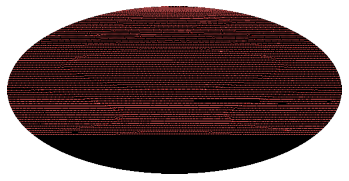

In [13]:
# retrieve the MOC
catalogue_coverage = MOC.from_fits(
    f"https://cdsarc.cds.unistra.fr/viz-bin/moc/{CATALOGUE}",
)
catalogue_coverage.display_preview()

We can plot the coverage with ``matplotlib``.

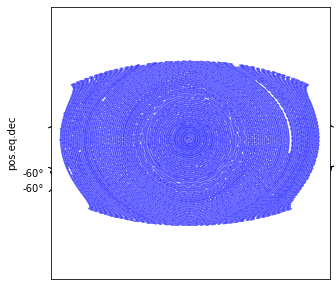

In [14]:
fig = plt.figure(figsize=(5, 5))
wcs = catalogue_coverage.wcs(fig)
ax = fig.add_subplot(projection=wcs)
catalogue_coverage.fill(ax=ax, wcs=wcs, alpha=0.5, color="blue")

or with ipyaladin

In [23]:
aladin = Aladin()
aladin

Aladin(init_options=['background_color', 'coo_frame', 'fov', 'full_screen', 'grid_color', 'grid_opacity', 'gri…

We can add the tables and coverage in this ipyaladin window.

In [24]:
aladin.add_table(conesearch_records.to_table())

In [25]:
aladin.add_table(tap_records.to_table())

In [19]:
aladin.add_moc_from_URL(
    f"https://cdsarc.cds.unistra.fr/viz-bin/moc/{CATALOGUE}",
    moc_options={"opacity": 0.5, "color": "pink"},
)

<ipython-input-19-6fbf199bb952>:1: DeprecationWarning: add_moc_from_URL is replaced by add_moc that detects automaticallythat the MOC was given as an URL.
  aladin.add_moc_from_URL(


For more information about manipulating coverages, see [MOCpy documentation](https://cds-astro.github.io/mocpy/).